Here is the code for our MGMT-172 project. We used various stock analysis techiques to find data regarding Kroger acquisitions. In the code block below is all the imports neccessary to generate the plots we used. If you are having trouble you might not have downloaded a requirement in pip. Additionally, the time objects are created in the block below.

In [57]:
#Imports
#!pip install yfinance
#!pip install fix_yahoo_finance
#!pip install plotly-express
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import yfinance as yf
#from yahoofinancials import YahooFinancials
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb
import plotly.express as px

import datetime
from datetime import date
%matplotlib inline

start = datetime.datetime(2020, 1, 1)

end = date.today()

This is a dataset generated from Yahoo Finance using the time frame.

In [2]:
#Data set 1
df2 = data.DataReader(['WMT', 'TGT', 'COST', 'KR', 'ACI'],'yahoo', start, end)
df2.head(10)
#Add wholefoods and amazon

Attributes   Adj Close                                              Close  \
Symbols            WMT         TGT        COST         KR ACI         WMT   
Date                                                                        
2020-01-02  113.801064  119.371849  277.666962  26.969685 NaN  118.940002   
2020-01-03  112.796432  118.131432  277.895599  27.007322 NaN  117.889999   
2020-01-06  112.566818  117.014145  277.971832  27.101427 NaN  117.650002   
2020-01-07  111.523895  117.222443  277.533661  26.903812 NaN  116.559998   
2020-01-08  111.141190  116.843712  280.715240  26.743837 NaN  116.160004   
2020-01-09  112.289337  116.938377  285.220947  26.762657 NaN  117.360001   
2020-01-10  111.351669  118.103027  283.144257  26.687380 NaN  116.379997   
2020-01-13  110.873276  117.288742  285.649567  26.743837 NaN  115.879997   
2020-01-14  111.160309  118.604889  285.535309  27.139065 NaN  116.180000   
2020-01-15  110.299202  110.783737  286.554504  26.621502 NaN  115.279999   

Attributes                                         ...        Open  \
Symbols            TGT        COST         KR ACI  ...         WMT   
Date                                               ...               
2020-01-02  126.070000  291.489990  28.660000 NaN  ...  118.860001   
2020-01-03  124.760002  291.730011  28.700001 NaN  ...  118.269997   
2020-01-06  123.580002  291.809998  28.799999 NaN  ...  117.400002   
2020-01-07  123.800003  291.350006  28.590000 NaN  ...  117.260002   
2020-01-08  123.400002  294.690002  28.420000 NaN  ...  116.300003   
2020-01-09  123.500000  299.420013  28.440001 NaN  ...  116.150002   
2020-01-10  124.730003  297.239990  28.360001 NaN  ...  117.239998   
2020-01-13  123.870003  299.869995  28.420000 NaN  ...  116.379997   
2020-01-14  125.260002  299.750000  28.840000 NaN  ...  115.470001   
2020-01-15  117.000000  300.820007  28.290001 NaN  ...  114.629997   

Attributes                                            Volume              \
Symbols            TGT        COST         KR ACI        WMT         TGT   
Date                                                                       
2020-01-02  128.740005  294.059998  29.030001 NaN  6764900.0   5149800.0   
2020-01-03  124.660004  290.049988  28.480000 NaN  5399200.0   5018500.0   
2020-01-06  123.970001  290.549988  28.570000 NaN  6445500.0   4226900.0   
2020-01-07  123.000000  291.320007  28.719999 NaN  6846900.0   3641600.0   
2020-01-08  124.050003  290.989990  28.709999 NaN  5875800.0   5731600.0   
2020-01-09  123.500000  298.549988  28.500000 NaN  5563700.0   5369700.0   
2020-01-10  124.709999  300.000000  28.400000 NaN  6054800.0   4678000.0   
2020-01-13  124.589996  296.920013  28.340000 NaN  6112600.0   3632800.0   
2020-01-14  123.599998  299.250000  28.330000 NaN  6585800.0   3291900.0   
2020-01-15  117.489998  298.350006  28.760000 NaN  7454200.0  26743400.0   

Attributes                            
Symbols          COST         KR ACI  
Date                                  
2020-01-02  2103600.0  6224900.0 NaN  
2020-01-03  1926000.0  5442000.0 NaN  
2020-01-06  2655100.0  6929600.0 NaN  
2020-01-07  1963400.0  5882200.0 NaN  
2020-01-08  2492800.0  7341600.0 NaN  
2020-01-09  3261200.0  5725300.0 NaN  
2020-01-10  2024200.0  4549300.0 NaN  
2020-01-13  1778600.0  3796000.0 NaN  
2020-01-14  1459900.0  6134700.0 NaN  
2020-01-15  1604000.0  5676400.0 NaN  

[10 rows x 30 columns]

Below are several data frames and a master data frame used to generate specific plots. These are all from Yahoo Finance using the DataReader method.

In [3]:
#Data set 2
Walmart = data.DataReader("WMT", 'yahoo', start, end)
Target = data.DataReader("TGT", 'yahoo', start, end)
Costco = data.DataReader("COST", 'yahoo', start, end)
Kroger = data.DataReader("KR", 'yahoo', start, end)
Albertsons = data.DataReader("ACI", 'yahoo', start, end)

Walmart["Company"]='Walmart'
Target["Company"]='Target'
Costco["Company"]='Costco'
Kroger["Company"]='Kroger'
Albertsons["Company"]='Albertsons'

master2 = pd.concat([Walmart,Target,Costco,Kroger,Albertsons],
                   keys=["Walmart","Target","Costco","Kroger","Albertsons"])
master2
#Add wholefoods and amazon

High         Low        Open       Close  \
           Date                                                         
Walmart    2020-01-02  119.889999  118.699997  118.860001  118.940002   
           2020-01-03  118.790001  117.589996  118.269997  117.889999   
           2020-01-06  118.089996  116.769997  117.400002  117.650002   
           2020-01-07  117.519997  116.199997  117.260002  116.559998   
           2020-01-08  116.730003  115.680000  116.300003  116.160004   
...                           ...         ...         ...         ...   
Albertsons 2022-11-18   20.840000   20.299999   20.730000   20.520000   
           2022-11-21   20.799999   20.430000   20.570000   20.440001   
           2022-11-22   20.715000   20.490000   20.490000   20.549999   
           2022-11-23   20.680000   20.420000   20.549999   20.440001   
           2022-11-25   20.690001   20.500000   20.510000   20.670000   

                          Volume   Adj Close     Company  
           Date                                           
Walmart    2020-01-02  6764900.0  113.801071     Walmart  
           2020-01-03  5399200.0  112.796425     Walmart  
           2020-01-06  6445500.0  112.566811     Walmart  
           2020-01-07  6846900.0  111.523895     Walmart  
           2020-01-08  5875800.0  111.141174     Walmart  
...                          ...         ...         ...  
Albertsons 2022-11-18  6182100.0   20.520000  Albertsons  
           2022-11-21  2628500.0   20.440001  Albertsons  
           2022-11-22  2744500.0   20.549999  Albertsons  
           2022-11-23  1873400.0   20.440001  Albertsons  
           2022-11-25   906100.0   20.670000  Albertsons  

[3538 rows x 7 columns]

The first plot shows the Adj Closures of Kroger and Albertsons. We thought this would be important to determine if consumers thought the acquisition would be profitable. 

Text(0, 0.5, 'Adjacent Closing Price')

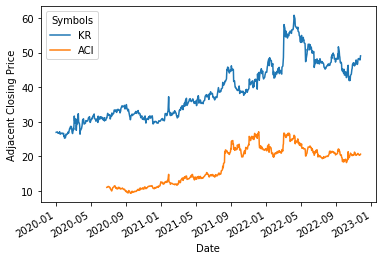

In [4]:
#Kroger and Albertsons Stock
ak = df2["Adj Close"][["KR","ACI"]]

akfig = ak.plot()

akfig.set_ylabel("Adjacent Closing Price")

We plotted Amazon during the Whole Foods acquisition to compare the two companies. While they operate in different industries we believe the data can reveal a trend in acquisitions. We needed to create a new date time objects and data frame to accomplish this. This data also came from Yahoo Finance. df3 was created here.

Text(0, 0.5, 'Adjacent Closing Price')

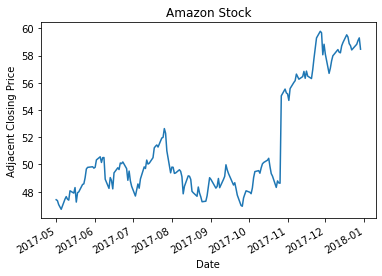

In [5]:
#Amazon stock during the time period it bought Whole Foods
s2 = datetime.datetime(2017, 5, 1)

e2 = datetime.datetime(2017, 12, 31)

df3 = data.DataReader('AMZN','yahoo', s2, e2)

aw = df3["Adj Close"]

awfig = aw.plot(title="Amazon Stock")

awfig.set_ylabel("Adjacent Closing Price")


In the past Kroger purchased another grocery company. Therefore, we made a plot to show this with new datatime objects and data frame from Yahoo Finance. df4 was created here.

Text(0, 0.5, 'Adjacent Closing Price')

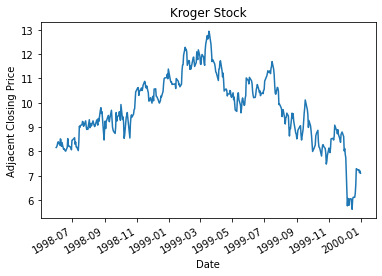

In [64]:
# Kroger Bought Ralphs 
s3 = datetime.datetime(1998, 6, 1)

e3 = datetime.datetime(1999, 12, 31)

df4 = data.DataReader('KR','yahoo', s3, e3)

tr = df4["Adj Close"]

trfig = tr.plot(title="Kroger Stock")

trfig.set_ylabel("Adjacent Closing Price")

We found that while stock prices increased when acquiring Ralphs they eventually plumeted. Furthermore, Kroger stock dipped after they acquired Albertsons. Intrestingly, Amazon skyrocketed after acquiring Whole Foods. We believe this data reveals the acquisition might not be the best idea.  

Using a perviously defined data frame (df4) we multiplied the open and volume of Kroger stock to find the stock trade during the ralphs acquisition.

<AxesSubplot:title={'center':'Total Kroger Stock Trade During Ralphs Aquisition'}, xlabel='Date'>

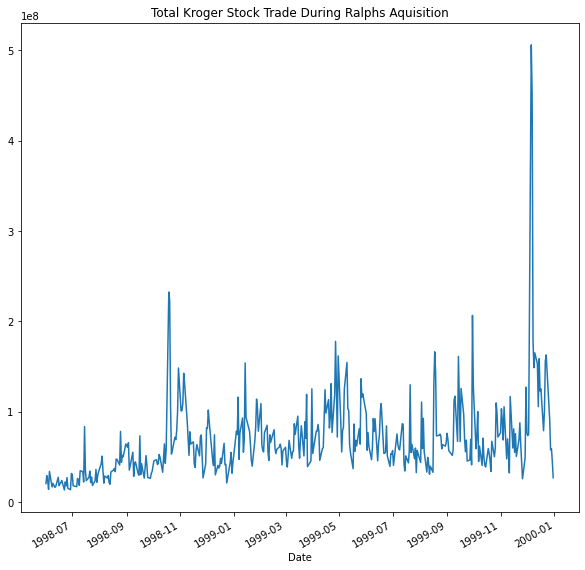

In [7]:
df4["Total Traded"] = df4["Open"]*df4["Volume"]
df4["Total Traded"].plot(title="Total Kroger Stock Trade During Ralphs Aquisition",figsize=(10,10))

We repeated the steps above to generate the total trade of Amazon stock during their Whole Foods acquisition. The manipulation occured on df3.

<AxesSubplot:title={'center':'Total Amazon Stock Trade During Whole Foods Aquisition'}, xlabel='Date'>

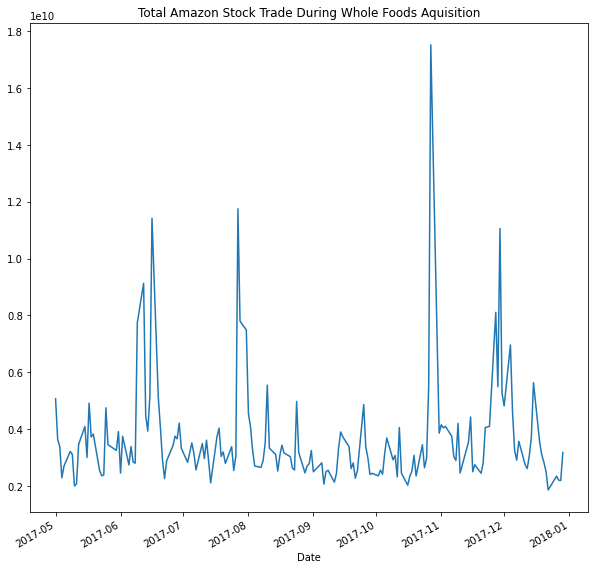

In [8]:
df3["Total Traded"] = df3["Open"]*df3["Volume"]
df3["Total Traded"].plot(title="Total Amazon Stock Trade During Whole Foods Aquisition",figsize=(10,10))

Finally we used the Kroger and Albertsons data frame to plot trade volume to idenfify a pattern during their acquisition.

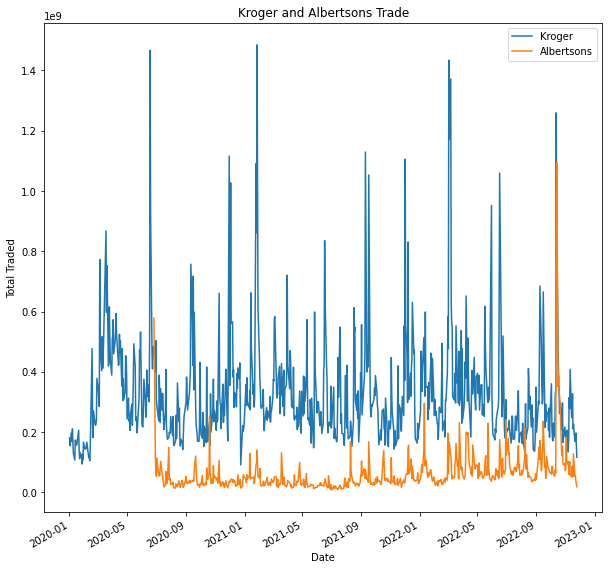

In [9]:
# Kroger and Albertsons stock trade during aquisition
Kroger["Kroger"] = Kroger["Open"]*Kroger["Volume"]
Albertsons["Albertsons"] = Albertsons["Open"]*Albertsons["Volume"]

Kroger["Kroger"].plot(title="Total Kroger Trade",figsize=(10,10))
Albertsons["Albertsons"].plot(title="Total Albertsons Trade",figsize=(10,10))

plt.legend()
plt.title("Kroger and Albertsons Trade")
plt.ylabel("Total Traded")
plt.show()

We found that Albertsons and Kroger follow very similar volumes. However, Albertsons has been consitently lower than Kroger. This might point to how the grocery giant was able to buy its competitior. However, the plots suggest high significance of market movement.

The next analysis we conduced was the rolling averages. To do this we created new columns in the Kroger data frame and used the rolling() method on the close column. Then the mean() method was applied. Using the new columns we plotted Rolling 300, close, and Rolling 60.

Text(0.5, 1.0, 'Kroger Moving Averages During Albertsons Aquisition')

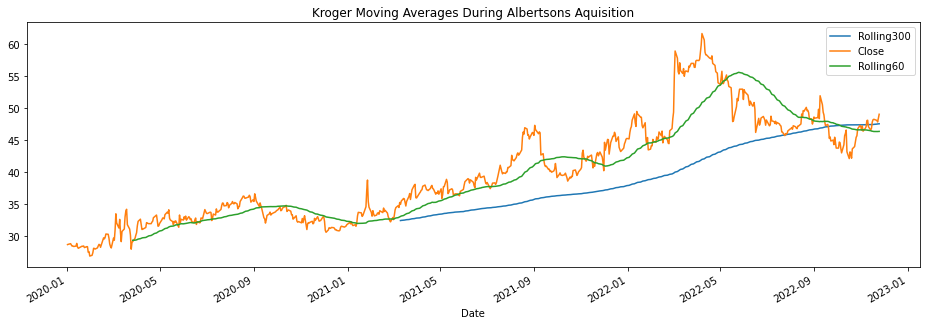

In [63]:
Kroger["Rolling300"]=Kroger["Close"].rolling(300).mean()
Kroger["Rolling300"].plot(figsize=(16,5))
Kroger["Close"].plot()
Kroger["Rolling60"]=Kroger["Close"].rolling(60).mean()
Kroger["Rolling60"].plot()

plt.legend()
plt.title("Kroger Moving Averages During Albertsons Aquisition")


The steps for Kroger where repeated on the Albertsons data frame. 

Text(0.5, 1.0, 'Albertsons Moving Averages')

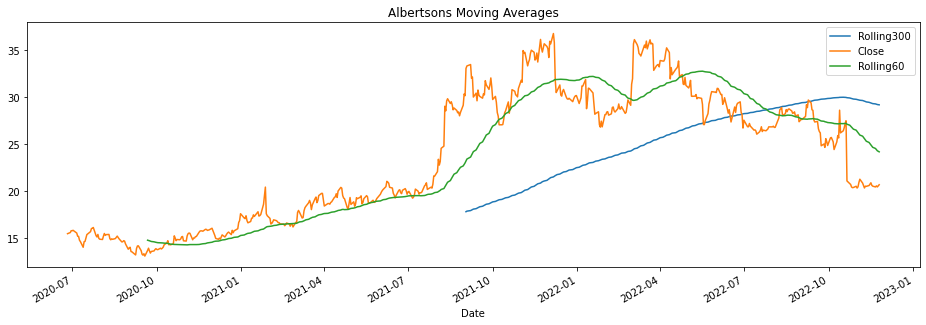

In [11]:
Albertsons["Rolling300"]=Albertsons["Close"].rolling(300).mean()
Albertsons["Rolling300"].plot(figsize=(16,5))
Albertsons["Close"].plot()
Albertsons["Rolling60"]=Albertsons["Close"].rolling(60).mean()
Albertsons["Rolling60"].plot()

plt.legend()
plt.title("Albertsons Moving Averages")


Using the data frame (df4) created to analyze Kroger during the Ralphs Acquisition we applied the rolling() method with the same arguments and took the mean to create another plot.

Text(0.5, 1.0, 'Kroger Moving Averages at time of Ralphs Aquisition')

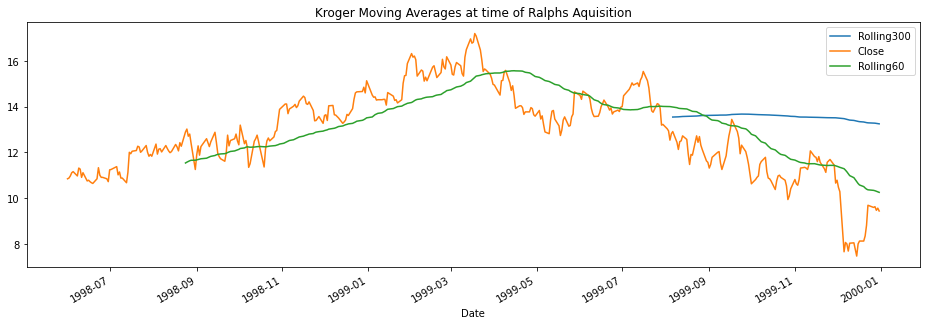

In [12]:
df4["Rolling300"]=df4["Close"].rolling(300).mean()
df4["Rolling300"].plot(figsize=(16,5))
df4["Close"].plot()
df4["Rolling60"]=df4["Close"].rolling(60).mean()
df4["Rolling60"].plot()

plt.legend()
plt.title("Kroger Moving Averages at time of Ralphs Aquisition")


We applied the same methods to the Amazon data frame (df3) during the Whole Foods Acquisition.

Text(0.5, 1.0, 'Amazon Moving Averages at time of Whole Foods Aquisition')

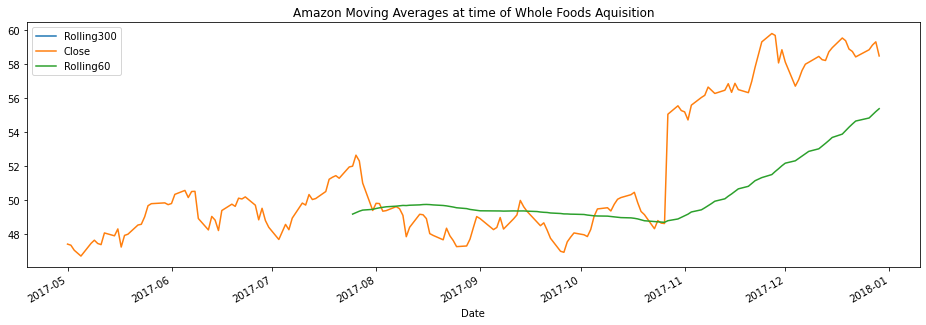

In [13]:
df3["Rolling300"]=df3["Close"].rolling(300).mean()
df3["Rolling300"].plot(figsize=(16,5))
df3["Close"].plot()
df3["Rolling60"]=df3["Close"].rolling(60).mean()
df3["Rolling60"].plot()

plt.legend()
plt.title("Amazon Moving Averages at time of Whole Foods Aquisition")


We found that Kroger is likely attempting to recreate the success of the Ralphs acquisition. However, given the success of services such as Amazon it is uncertain if the sucess is replicatable.

The next plots are an analysis of return volatility. This was accomplished by applying the .pct_change() method on the close colunm and creating a new returns column. Then the .hist() method was used. We had to install pylab to add titles to our plots. This manipulation was done to the Kroger data frame, Albertsons data frame, and Kroger during Ralphs data frame(df4).

Text(0.5, 1.0, 'Kroger Returns during Albertsons Aquisition')

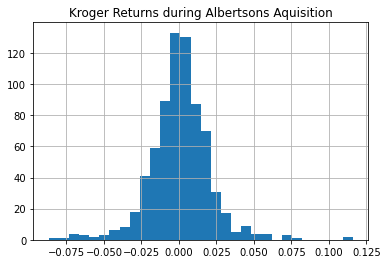

In [62]:
Kroger["returns"] = Kroger["Close"].pct_change()
Kroger["returns"].hist(bins=30)
py.title("Kroger Returns during Albertsons Aquisition")

Text(0.5, 1.0, 'Albertsons Returns during Kroger Aquisition')

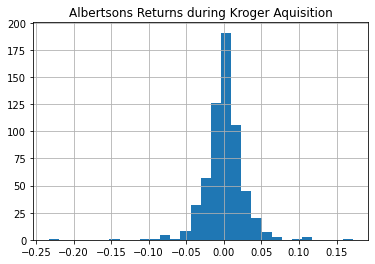

In [60]:
Albertsons["returns"] = Albertsons["Close"].pct_change()
Albertsons["returns"].hist(bins=30)
py.title("Albertsons Returns during Kroger Aquisition")

Text(0.5, 1.0, 'Kroger Returns When Aquiring Ralphs')

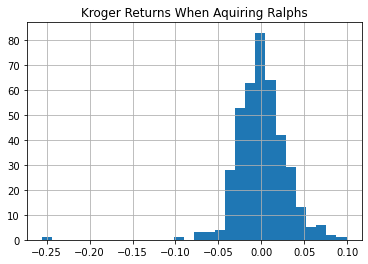

In [59]:
#Kroger at time of aquiring raphs
df4["returns"] = df4["Close"].pct_change()
df4["returns"].hist(bins=30)
py.title("Kroger Returns When Aquiring Ralphs")

We found that the Albertsons acquisition was more risky for Kroger. This is also very different from Amazon's acquisition of Whole Foods. This means shareholders might not think the acquisition was a good move. 

In order to clean the data we generated by searching the number of store locations we needed a data frame containing all the state ids. The data was taken from https://worldpopulationreview.com/states/state-abbreviations. However, not all the data was needed and we had to drop a column from the data frame. Finally, we created a dictionary to iterate over later.

In [18]:
states = pd.read_csv("csvData.csv")

states = states.set_index("state")
states = states.drop("abbrev", axis=1)

states = states.to_dict()

We created an Albertsons.csv and Kroger.csv with the number of store locations in each state for each respective store.

In [19]:
alb = pd.read_csv('Albertsons.csv')
alb

,State,Number of Stores
0,Arizona,30
1,Arkansas,1
2,California,125
3,Colorado,2
4,Idaho,39
5,Louisiana,16
6,Motana,29
7,Nevada,35
8,New Mexico,6
9,North Dakota,1


In order to create the choropleths we needed to use state ids to call the function, therefore, in each data frame we created an empty column called ids using a lambda function.

In [20]:
alb["ids"]=alb.apply(lambda _:"",axis=1)
alb

,State,Number of Stores,ids
0,Arizona,30,
1,Arkansas,1,
2,California,125,
3,Colorado,2,
4,Idaho,39,
5,Louisiana,16,
6,Motana,29,
7,Nevada,35,
8,New Mexico,6,
9,North Dakota,1,


This is the Kroger.csv data frame (kro). The same methods were done to it as the Albertsons data frame.

In [21]:
kro = pd.read_csv('Kroger.csv')
kro

,State,Number of stores
0,Alabama,10
1,Arkansas,26
2,Georgia,167
3,Illinois,30
4,Indiana,103
5,Kentucky,104
6,Louisiana,8
7,Michigan,120
8,Missouri,3
9,Mississippi,29


In [22]:
kro["ids"]=kro.apply(lambda _:"",axis=1)
kro

,State,Number of stores,ids
0,Alabama,10,
1,Arkansas,26,
2,Georgia,167,
3,Illinois,30,
4,Indiana,103,
5,Kentucky,104,
6,Louisiana,8,
7,Michigan,120,
8,Missouri,3,
9,Mississippi,29,


Unfortunatly, some of the state names where misspelled. So we used the .loc function to correct the data.

In [27]:
#Virginia is misplelled so I needed to fix it
kro.loc[kro["State"]=="West Virgina","State"]="West Virginia"
kro.loc[kro["State"]=="Virgina","State"]="Virginia"
alb.loc[alb["State"]=="Motana","State"]="Montana"

We created a new dictionary; since, states was a nested dictionary. Then we iterated over the dictionary and checked if a key was in each data frame. If it is the data frame's ids column is updated with the state id.

In [28]:
s = states["code"]

for k, v in s.items():
    if k in alb.State.values:
        alb.loc[alb["State"]==k,"ids"]=v
    if k in kro.State.values:
        kro.loc[kro["State"]==k,"ids"]=v
alb

,State,Number of Stores,ids
0,Arizona,30,AZ
1,Arkansas,1,AR
2,California,125,CA
3,Colorado,2,CO
4,Idaho,39,ID
5,Louisiana,16,LA
6,Montana,29,MT
7,Nevada,35,NV
8,New Mexico,6,NM
9,North Dakota,1,ND


Using the plotly.express we created choropleth with the cleaned data from the alb and kro data frames. Using the ids column as a key and heat colors to show the intensity of the number of stores. The data came from https://www.scrapehero.com/location-reports/Albertsons-USA/ and
https://www.scrapehero.com/kroger-store-locations/

In [40]:
fig = px.choropleth(alb, locations="ids",locationmode="USA-states", scope="usa",
                    color="Number of Stores",color_continuous_scale="plasma", 
                    title="No. Albertsons Locations")

fig.show()

In [41]:
fig = px.choropleth(kro, locations="ids",locationmode="USA-states", scope="usa",
                    color="Number of stores",color_continuous_scale="plasma",
                   title="No. Kroger Locations")

fig.show()

We found that Kroger likely used the acquisition to expand their reach into the western United States.

The following is a data frame we created from company balance sheets. They have quartly revenues from 2018 onwards. 

In [17]:
reven = pd.read_excel('172- revenue.xlsx')
reven

,Revenue,Kroger,Albertsons,Walmart,Costco
0,(Millions of US $),NaN,NaN,NaN,NaN
1,2018 Q1,31649.0,NaN,136267.0,32995.0
2,2018 Q2,37722.0,NaN,122690.0,32361.0
3,2018 Q3,28014.0,NaN,128028.0,44411.0
4,2018 Q4,27831.0,NaN,124894.0,35069.0
5,2019 Q1,28285.0,NaN,138793.0,35396.0
6,2019 Q2,37251.0,18738.0,123925.0,34740.0
7,2019 Q3,28168.0,14177.0,130377.0,47498.0
8,2019 Q4,27974.0,14103.0,127991.0,37040.0
9,2020 Q1,28893.0,15437.0,141671.0,39072.0


We needed to clean the reven data frame generated earlier. Therefore, we set the quarters to be the index and deleted the first row. The first row did not have relevent data. This was accomplished using the .set_index() method and .iloc method.

In [31]:
reven
reven = reven.set_index("Revenue")
reven = reven.iloc[1: , :]
reven

,Kroger,Albertsons,Walmart,Costco
Revenue,,,,
2018 Q1,31649.0,NaN,136267.0,32995.0
2018 Q2,37722.0,NaN,122690.0,32361.0
2018 Q3,28014.0,NaN,128028.0,44411.0
2018 Q4,27831.0,NaN,124894.0,35069.0
2019 Q1,28285.0,NaN,138793.0,35396.0
2019 Q2,37251.0,18738.0,123925.0,34740.0
2019 Q3,28168.0,14177.0,130377.0,47498.0
2019 Q4,27974.0,14103.0,127991.0,37040.0
2020 Q1,28893.0,15437.0,141671.0,39072.0


The following plots where created by creating new data frames with only a column of interest using the .loc function. The plots show quarterly revenues.

Text(0, 0.5, 'Revenue')

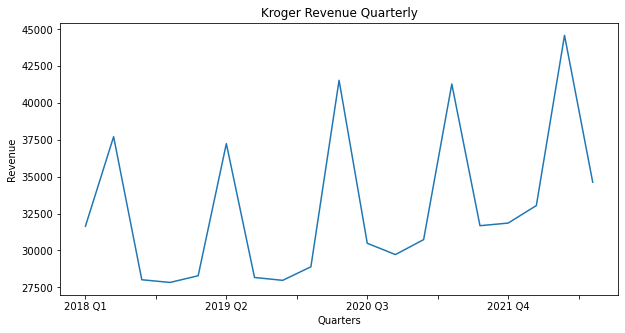

In [49]:
kroger = reven.loc[:,"Kroger"]
k = kroger.plot(figsize=(10,5),title="Kroger Revenue Quarterly",)
k.set_xlabel("Quarters")
k.set_ylabel("Revenue")

Text(0, 0.5, 'Revenue')

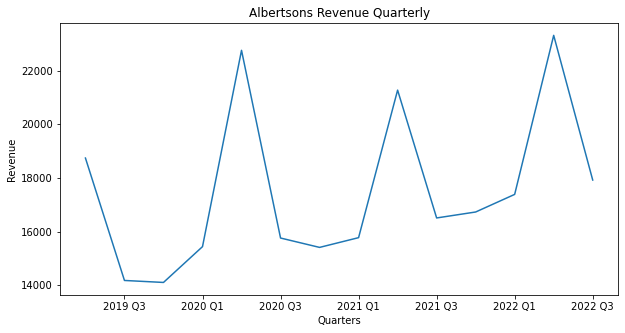

In [51]:
albert = reven.loc[:,"Albertsons"]
a=albert.plot(figsize=(10,5),title="Albertsons Revenue Quarterly")
a.set_xlabel("Quarters")
a.set_ylabel("Revenue")

Text(0, 0.5, 'Revenue')

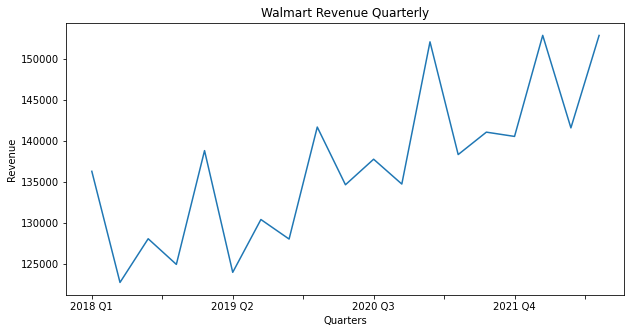

In [52]:
walt = reven.loc[:,"Walmart"]
w=walt.plot(figsize=(10,5),title="Walmart Revenue Quarterly")
w.set_xlabel("Quarters")
w.set_ylabel("Revenue")

Text(0, 0.5, 'Revenue')

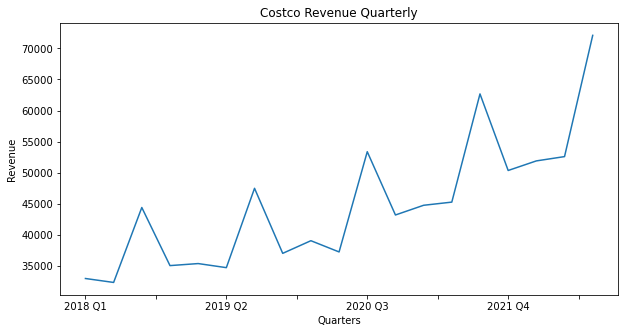

In [53]:
cost = reven.loc[:,"Costco"]
c=cost.plot(figsize=(10,5),title="Costco Revenue Quarterly")
c.set_xlabel("Quarters")
c.set_ylabel("Revenue")

We found the peakyness of the data to be very interesting. Additionally, all of the companies show a general upward trend. Therefore, Kroger might have purchased Albertsons to boost revenues. However, Kroger might struggle to remain profitable against major competitors such as Walmart and Costco.